In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

In [2]:
data_path = "https://www.statlearning.com/s/Advertising.csv" 

# Read the CSV data from the link
data_df = pd.read_csv(data_path,index_col=0)

# Print out first 5 samples from the DataFrame
data_df.head()

,TV,radio,newspaper,sales
1,230.1,37.8,69.2,22.1
2,44.5,39.3,45.1,10.4
3,17.2,45.9,69.3,9.3
4,151.5,41.3,58.5,18.5
5,180.8,10.8,58.4,12.9


In [5]:
X = data_df.drop(['sales'], axis=1)

In [6]:
X.describe()

,TV,radio,newspaper
count,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000
std,85.854236,14.846809,21.778621
min,0.700000,0.000000,0.300000
25%,74.375000,9.975000,12.750000
50%,149.750000,22.900000,25.750000
75%,218.825000,36.525000,45.100000
max,296.400000,49.600000,114.000000


In [7]:
scaler = StandardScaler()
scaled_X = scaler.fit_transform(X)

In [11]:
pd.DataFrame(scaled_X, columns = X.columns).describe()

,TV,radio,newspaper
count,2.000000e+02,2.000000e+02,2.000000e+02
mean,1.221245e-16,-4.529710e-16,2.220446e-16
std,1.002509e+00,1.002509e+00,1.002509e+00
min,-1.708823e+00,-1.570868e+00,-1.392646e+00
25%,-8.485295e-01,-8.973206e-01,-8.195504e-01
50%,3.161515e-02,-2.457858e-02,-2.211368e-01
75%,8.381955e-01,8.954299e-01,6.695788e-01
max,1.744029e+00,1.778300e+00,3.841171e+00


In [12]:
X = np.c_[np.ones(shape = (200,1)), scaled_X]
y = data_df['sales'].values.reshape(-1,1)

In [13]:
n, d = X.shape

## Random Initialization


In [14]:
def initializer(d):
    np.random.seed(0)
    betas = np.random.randn(d,1)
    return betas

betas = initializer(d)
print(betas)

[[1.76405235]
 [0.40015721]
 [0.97873798]
 [2.2408932 ]]


## Cost Function

In [15]:
def calculate_cost(betas):
  cost = 1/2 * np.sum(np.square(np.dot(X, betas)-y))
  return cost

print("Cost with random betas:", calculate_cost(betas))

Cost with random betas: 17073.932296410057


## Gradient

In [16]:
def calculate_gradients(X, y, betas):
    gradient = np.dot(X.T, (np.dot(X,betas) - y))
    return gradient

print("Gradients", calculate_gradients(X,y, betas))

Gradients [[-2451.68953081]
 [ -698.05275055]
 [ -240.94240852]
 [  284.39547481]]


## Gradient Descent

In [17]:
def gradient_descent(X,y, alpha = 0.01, max_iters = 1000, precision_change = 1e-3):
    iteration = 0
    difference = 1
    n,d = X.shape
    
    betas = initializer(d)
    cost = calculate_cost(betas)
    history = [calculate_cost(betas)]

    while difference > precision_change and iteration <= max_iters:

        # updating betas
        betas = betas - alpha * calculate_gradients(X, y, betas)

        cost = calculate_cost(betas)
        difference= np.abs(history[iteration] - cost)
        history.append(cost)

        print(f"Iteration: {iteration}, cost: {cost}")
        iteration += 1
        
        if(cost == np.inf):
          print("Cost reached infinity, try smaller learning rate")
          break

    return betas, iteration, history

In [23]:
optimized_betas, best_step, cost_history = gradient_descent(X,y, alpha = 0.003)

Iteration: 0, cost: 3088.921208468105
Iteration: 1, cost: 773.3549524960547
Iteration: 2, cost: 374.27426818129265
Iteration: 3, cost: 299.94774436625687
Iteration: 4, cost: 284.1733262517472
Iteration: 5, cost: 280.20114133374136
Iteration: 6, cost: 279.02366882299606
Iteration: 7, cost: 278.63221698846155
Iteration: 8, cost: 278.49345361475844
Iteration: 9, cost: 278.44270007295756
Iteration: 10, cost: 278.42387056330193
Iteration: 11, cost: 278.41684095251674
Iteration: 12, cost: 278.4142094554077
Iteration: 13, cost: 278.41322321503844


In [26]:
optimized_betas

array([[14.02246709],
       [ 3.91922926],
       [ 2.78992555],
       [-0.02039571]])

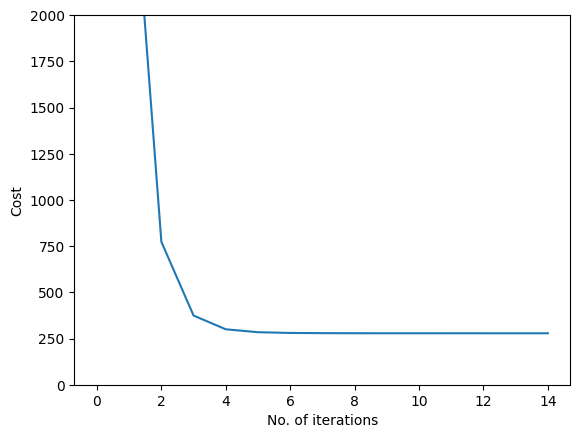

In [25]:
plt.plot(cost_history)
plt.xlabel("No. of iterations")
plt.ylabel("Cost")
plt.ylim(0, 2000)
plt.show()